<a href="https://colab.research.google.com/github/mcnica89/FunProblems/blob/main/Sum_of_Dice_Rolls_Calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sys
print(sys.version)

3.7.15 (default, Oct 12 2022, 19:14:55) 
[GCC 7.5.0]


# The Problem

Find the probability that the sum of 10 dice is larger than 40.

# For loop solution (slow!)

In [ ]:
%%time
#Takes ~30 seconds
count = 0
for i1 in range(1,7):
  for i2 in range(1,7):
    for i3 in range(1,7):
      for i4 in range(1,7):
        for i5 in range(1,7):
          for i6 in range(1,7):
            for i7 in range(1,7):
              for i8 in range(1,7):
                for i9 in range(1,7):
                  for i10 in range(1,7):
                      if (i1+i2+i3+i4+i5+i6+i7+i8+i9+i10) >= 40:
                        count += 1

print("Number of possibilities: ", count)
print(f"Probability: {count/6**10:.3f}")

Number of possibilities:  12393645
Probability: 0.205
CPU times: user 29.4 s, sys: 199 ms, total: 29.6 s
Wall time: 34.8 s


# Using itertools (better version of nested for loops)

In [ ]:
%%time
#Takes ~20 seconds
import itertools as it
n = 10 #number of rolls
k = 40 #target

num_rolls = sum([sum(rolls) >= 40 for rolls in it.product(range(1,7), repeat=n)])

print("Number of possibilities: ", num_rolls)
print(f"Probability: {num_rolls/6**10:.3f}")

Number of possibilities:  12393645
Probability: 0.205
CPU times: user 19.8 s, sys: 1.61 s, total: 21.4 s
Wall time: 22.9 s


# Markov chain method

Number of combinations of 10 rolls >= 40: 12393645
Prob sum of 10 rolls >= 40: 0.205
Prob sum_of_10_rolls = 40 exactly: 0.048
CPU times: user 46.5 ms, sys: 0 ns, total: 46.5 ms
Wall time: 83 ms


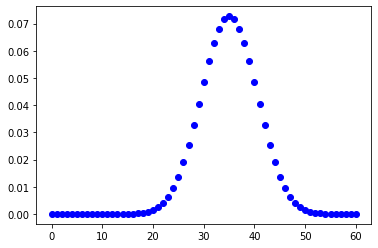

In [ ]:
%%time
#Takes ~0.1 seconds
max_X = 60

plus_dice_roll = np.zeros((1+max_X,1+max_X),dtype=int) #this will be the Markov chain tranisition matrix for +1d6
i,j = np.indices((1+max_X,1+max_X))

for off in range(1,7):
  plus_dice_roll[j==i+off] = 1 #ordinary counts
  plus_dice_roll[(i+off > max_X) * (j==max_X)] += 1 #overflow counts


n = 10 #number of dice to roll
sum_of_n_rolls = np.linalg.matrix_power(plus_dice_roll,n)[0,:]
plt.plot(sum_of_n_rolls/6**n,'bo')


k = 40 #target value to roll more than
print(f"Number of combinations of {n} rolls >= {k}: {np.sum(sum_of_n_rolls[k:])}")

print(f"Prob sum of {n} rolls >= {k}: {np.sum(sum_of_n_rolls[k:])/6**n:.3f}")

print(f"Prob sum_of_{n}_rolls = {k} exactly: {sum_of_n_rolls[40]/6**n:.3f}")

# CLT type calculation

In [ ]:
import math
def phi(x):
    'Cumulative distribution function for the standard normal distribution'
    return (1.0 + math.erf(x / math.sqrt(2.0))) / 2.0

In [ ]:
def CLT_prob(n,k):
  'CLT prob of n dice being larger than k'
  dice = np.array([1,2,3,4,5,6])
  dice_sd = np.sqrt( np.sum( (dice - 3.5)**2 )/6 )
  s = (k-3.5*n)/np.sqrt(n)/dice_sd
  return 1-phi(s)

In [ ]:
CLT_prob(10,40) #This estimate is off by a fair bit!

0.17726973988675065

In [ ]:
CLT_prob(10,39.5) #This is quite close!

0.20235523231360775